# Sentiment Analysis and Zero-Shot Classification

## Garden Tech

In [1]:
import pandas as pd
!pip install numpy==1.22.0
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement numpy==1.22.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0rc1, 1.16.0rc2, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0rc1, 1.17.0rc2, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0rc1, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0rc1, 1.19.0rc2, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0rc1, 1.20.0rc2, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0rc1, 1.21.0rc2, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6)
ERROR: No matching 

In [2]:
!pip install torch torchvision torchaudio
import torch

!pip install tensorflow
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tf.Tensor(-433.9212, shape=(), dtype=float32)


In [3]:
!pip install transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 4.3 MB/s 
     |████████████████████████████████| 163 kB 23.5 MB/s 
     |████████████████████████████████| 7.6 MB 5.6 MB/s 


Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ImageforWeeds.csv to ImageforWeeds.csv


In [5]:
df = pd.read_csv('ImageforWeeds.csv', index_col = [0])

# Sentiment Analysis

In [6]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [7]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

##negative with score of 0.797

[{'label': 'Positive', 'score': 0.9755468964576721}]

In [8]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


## Zero Shot Classificaiton

In [9]:
import transformers
from transformers import pipeline

In [10]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Sample Classification

this is where you can play around with the labels to see which ones would make sense

In [12]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[1]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## Quality and Satisfaction, which are the factors with the two highest scores, make sense 

{'sequence': '[This review was collected as part of a promotion.] This product was easy to use and did what it was advertised to do. My yard has a great look to it now!',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9974178075790405,
  0.8326179385185242,
  0.4537894129753113,
  0.0015857748221606016]}

In [13]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[2]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## The review seems to have low satisfaction and the satisfaction score (0.208) corresponds and the main reason is relevant to Quality (0.779).

{'sequence': '[This review was collected as part of a promotion.] Tried the weed & crabgrass spray. I havent notice any change in lawn appearance. Stayed the clover and danilion, but they still grow as usual. I will try longer to see if there are changes',
 'labels': ['quality', 'affordability', 'satisfaction', 'complaints'],
 'scores': [0.7785077095031738,
  0.2131129950284958,
  0.20805910229682922,
  0.19833238422870636]}

In [14]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[3]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## It is a mild complaint and the score corresponds (0.459)

{'sequence': '[This review was collected as part of a promotion.] The product seems to work great on killing the grass that we dont want but when we applied it the bottle didnt seem to hook up to the water hose fully so there was water spraying everywhere it was just a huge mess.',
 'labels': ['complaints', 'quality', 'affordability', 'satisfaction'],
 'scores': [0.4592539966106415,
  0.10848885774612427,
  0.022764824330806732,
  0.006871566642075777]}

In [15]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[4]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## This is related to Quality (0.925) but the sentiment is Complaints (0.032), not Satisfaction (0.635) and thus the result does not match.

{'sequence': 'Did not kill anything.',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9254496693611145,
  0.6352580785751343,
  0.4688342213630676,
  0.03157944232225418]}

# Zero Shot Classification (Entire data)

Using the labels you identified above, you want to now run it through the entire data

In [16]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [17]:
# insert the labels you identified from above section
type = ['cost', 'efficient', 'effective', 'ease of use']

In [18]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [19]:
# create a "max" column for metric purposes
df['max'] = df[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost_m,efficient_m,effective_m,ease of use_m,max
4951,Garden,56444,Image All-In-One Weed Killer Ready-to-Spray,https://www.lowes.com/pd/IMAGE-All-In-One-24-o...,Lowes,ImageforWeeds,999990274,999990274,No,2021-06-22T00:00:00,2021,6,25,Excellent product,[This review was collected as part of a promot...,syndicated reviews,20.98,5,0,0,0,Yes,[this review was collected as part of a promot...,2021-06-22,36,Positive,0.668977,0.995549,0.998445,0.993887,0.998445
26257,Garden,142189,IMAGE Lawn Weed & Crabgrass Killer Concentrate,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670295,311670269,Yes,2022-06-28T00:00:00,2022,6,26,Easy Spray Lawn Management,[This review was collected as part of a promot...,syndicated reviews,13.47,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-28,32,Positive,0.454413,0.987949,0.998777,0.997621,0.998777
25935,Garden,141867,IMAGE Lawn Weed & Crabgrass Killer Ready-To-Spray,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670269,311670269,Yes,2022-06-13T00:00:00,2022,6,24,Nothing noticeable,[This review was collected as part of a promot...,syndicated reviews,15.47,3,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-13,44,Neutral,0.693855,0.716928,0.262990,0.313412,0.716928


# Metric and Sanity Check

AttributeError: ignored

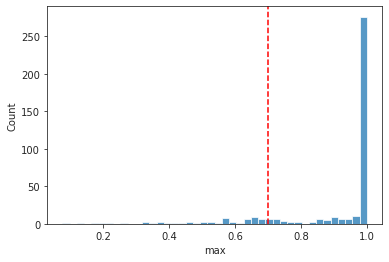

In [20]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df[df['max'] > 0.7])/len(df['max'])
#subcategories of quality. may be too broad


list(df[df['max'] > 0.7]['review_lower'][1:2])

In [21]:
# to see how many uncategorized data remains
df_uncat = df[df['cost_m'] < 0.7]
df_uncat = df_uncat[df_uncat['efficient_m'] < 0.7]
df_uncat = df_uncat[df_uncat['effective_m'] < 0.7]
df_uncat = df_uncat[df_uncat['ease of use_m'] < 0.7]
df_uncat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 25910 to 25504
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   segment               58 non-null     object 
 1   review_id             58 non-null     int64  
 2   product_name          58 non-null     object 
 3   producturl            58 non-null     object 
 4   retailer              58 non-null     object 
 5   brand                 58 non-null     object 
 6   retailer_product_id   58 non-null     object 
 7   base_id               58 non-null     object 
 8   variants_flag         58 non-null     object 
 9   review_creation_date  58 non-null     object 
 10  year                  58 non-null     int64  
 11  month                 58 non-null     int64  
 12  week                  58 non-null     int64  
 13  review_title          58 non-null     object 
 14  review_text           58 non-null     object 
 15  review_type       

In [22]:
df_uncat.to_csv('unlabeled_imageforweeds.csv')

from google.colab import files
files.download("unlabeled_imageforweeds.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>